In [ ]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py

In [79]:
py.offline.init_notebook_mode()
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)

In [26]:
book = 'greatex_100k'
ents = pd.read_csv(r'outputs\{book}.edf.csv'.format(book=book))
data = pd.read_csv(r'outputs\{book}.df.csv'.format(book=book))

rel_cols = list(data.columns[list(data.columns.str.startswith('R_'))])
lex_cols = list(data.columns[list(data.columns.str.startswith('L_'))])

In [27]:
data

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
0              0              0.0                     0.0                0.0   
1              1              0.0                     0.0                0.0   
2              2              0.0                     0.0                0.0   
3              3              0.0                     0.0                0.0   
4              4              0.0                     0.0                0.0   
5              5              0.0                     0.0                0.0   
6              6              0.0                     0.0                0.0   
7              7              0.0                     0.0                0.0   
8              8              0.0                     0.0                0.0   
9              9              0.0                     0.0                0.0   
10            10              0.0                     0.0                0.0   
11            11              0.0                     0.0                0.0   
12            12              0.0                     0.0                0.0   
13            13              0.0                     0.0                0.0   
14            14              0.0                     0.0                0.0   
15            15              0.0                     1.0                0.0   
16            16              0.0                     0.0                0.0   
17            17              0.0                     0.0                0.0   
18            18              0.0                     0.0                0.0   
19            19              0.0                     0.0                0.0   
20            20              0.0                     0.0                0.0   
21            21              0.0                     0.0                0.0   
22            22              0.0                     0.0                0.0   
23            23              0.0                     0.0                0.0   
24            24              0.0                     0.0                0.0   
25            25              0.0                     0.0                0.0   
26            26              0.0                     1.0                0.0   
27            27              0.0                     0.0                0.0   
28            28              0.0                     0.0                0.0   
29            29              0.0                     0.0                0.0   
...          ...              ...                     ...                ...   
1055        1055              0.0                     0.0                0.0   
1056        1056              0.0                     0.0                0.0   
1057        1057              0.0                     0.0                0.0   
1058        1058              0.0                     0.0                0.0   
1059        1059              0.0                     0.0                0.0   
1060        1060              0.0                     0.0                0.0   
1061        1061              0.0                     0.0                0.0   
1062        1062              0.0                     0.0                0.0   
1063        1063              0.0                     0.0                0.0   
1064        1064              0.0                     0.0                0.0   
1065        1065              0.0                     1.0                0.0   
1066        1066              0.0                     1.0                0.0   
1067        1067              0.0                     1.0                0.0   
1068        1068              0.0                     1.0                0.0   
1069        1069              0.0                     0.0                0.0   
1070        1070              0.0                     0.0                0.0   
1071        1071              0.0                     0.0                0.0   
1072        1072              0.0                     0.0                0.0   
1073  

In [28]:
ents

Unnamed: 0        categ  entity_i entity_pos  entity_root entity_tag  \
0              0      unknown       NaN        NaN      UNKNOWN        NaN   
1              1      unknown       NaN        NaN      UNKNOWN        NaN   
2              2      unknown       NaN        NaN      UNKNOWN        NaN   
3              3      unknown       NaN        NaN      UNKNOWN        NaN   
4              4      unknown       NaN        NaN      UNKNOWN        NaN   
5              5      unknown       NaN        NaN      UNKNOWN        NaN   
6              6      unknown       NaN        NaN      UNKNOWN        NaN   
7              7      unknown       NaN        NaN      UNKNOWN        NaN   
8              8      unknown       NaN        NaN      UNKNOWN        NaN   
9              9      unknown       NaN        NaN      UNKNOWN        NaN   
10            10      unknown       NaN        NaN      UNKNOWN        NaN   
11            11      unknown       NaN        NaN      UNKNOWN        NaN   
12            12      unknown       NaN        NaN      UNKNOWN        NaN   
13            13      unknown       NaN        NaN      UNKNOWN        NaN   
14            14      unknown       NaN        NaN      UNKNOWN        NaN   
15            15      unknown       NaN        NaN      UNKNOWN        NaN   
16            16      unknown       NaN        NaN      UNKNOWN        NaN   
17            17      unknown       NaN        NaN      UNKNOWN        NaN   
18            18      unknown       NaN        NaN      UNKNOWN        NaN   
19            19      unknown       NaN        NaN      UNKNOWN        NaN   
20            20      unknown       NaN        NaN      UNKNOWN        NaN   
21            21      unknown       NaN        NaN      UNKNOWN        NaN   
22            22      unknown       NaN        NaN      UNKNOWN        NaN   
23            23  environment       NaN        NaN  ENVIRONMENT        NaN   
24            24      unknown       NaN        NaN      UNKNOWN        NaN   
25            25      unknown       NaN        NaN      UNKNOWN        NaN   
26            26  environment       NaN        NaN  ENVIRONMENT        NaN   
27            27      unknown       NaN        NaN      UNKNOWN        NaN   
28            28      unknown       NaN        NaN      UNKNOWN        NaN   
29            29      unknown       NaN        NaN      UNKNOWN        NaN   
...          ...          ...       ...        ...          ...        ...   
5036        5036       person     393.0       NOUN          man         NN   
5037        5037       person     394.0        DET          her       PRP$   
5038        5038       person     394.0        DET          her       PRP$   
5039        5039       person     395.0       PRON           we        PRP   
5040        5040       person     395.0       PRON           we        PRP   
5041        5041       person     395.0       PRON           we        PRP   
5042        5042       person     395.0       PRON           we        PRP   
5043        5043      unknown     396.0       PRON         they        PRP   
5044        5044      unknown     396.0       PRON         they        PRP   
5045        5045  environment     397.0       NOUN      kitchen         NN   
5046        5046  environment     397.0       NOUN      kitchen         NN   
5047        5047  environment     398.0       NOUN      nothing         NN   
5048        5048  environment     398.0       NOUN      nothing         NN   
5049        5049  environment     399.0       NOUN       bonnet         NN   
5050        5050  environment     399.0       NOUN       bonnet         NN   
5051        5051       person     400.0       NOUN          boy         NN   
5052        5052       person     400.0       NOUN          boy         NN   
5053        5053     narrator     401.0       PRON            i        PRP   
5054        5054     narrator     401.0       PRON            i        PRP   
5055        5055     narrato

In [29]:
ent_counts = pd.concat([data[r] for r in rel_cols], axis='rows').dropna().value_counts()
most_common = ent_counts.idxmax() # most common
print('most_common =', most_common)
ent_counts

most_common = man


man                  244
i                    138
mist                 135
me                    80
my                    77
joe                   49
sister                38
mrs. joe              36
sergeant              24
he                    22
aunt                  22
sir                   15
you                   14
we                    13
they                  13
it                    13
mr. wopsle            13
creature              12
boy                   12
convict               11
mr. pumblechook       11
lookee                10
his                    8
men                    8
roman                  7
him                    6
disclosure             6
father                 6
people                 5
us                     5
                    ... 
fire                   2
joe gargery            2
society                2
convicts               1
young                  1
forge                  1
your                   1
tho                    1
yours                  1


In [30]:
ents[ents.categ == 'narrator']

Unnamed: 0     categ  entity_i entity_pos entity_root entity_tag  \
90            90  narrator       NaN        NaN    NARRATOR        NaN   
96            96  narrator       NaN        NaN    NARRATOR        NaN   
214          214  narrator       NaN        NaN    NARRATOR        NaN   
441          441  narrator       NaN        NaN    NARRATOR        NaN   
708          708  narrator       NaN        NaN    NARRATOR        NaN   
795          795  narrator       NaN        NaN    NARRATOR        NaN   
1232        1232  narrator       NaN        NaN    NARRATOR        NaN   
1268        1268  narrator       NaN        NaN    NARRATOR        NaN   
1305        1305  narrator       NaN        NaN    NARRATOR        NaN   
1318        1318  narrator       NaN        NaN    NARRATOR        NaN   
1587        1587  narrator       NaN        NaN    NARRATOR        NaN   
1974        1974  narrator       NaN        NaN    NARRATOR        NaN   
2036        2036  narrator       0.0        DET          my       PRP$   
2037        2037  narrator       0.0        DET          my       PRP$   
2038        2038  narrator       0.0        DET          my       PRP$   
2039        2039  narrator       0.0        DET          my       PRP$   
2040        2040  narrator       0.0        DET          my       PRP$   
2041        2041  narrator       0.0        DET          my       PRP$   
2042        2042  narrator       0.0        DET          my       PRP$   
2043        2043  narrator       0.0        DET          my       PRP$   
2044        2044  narrator       0.0        DET          my       PRP$   
2045        2045  narrator       0.0        DET          my       PRP$   
2046        2046  narrator       0.0        DET          my       PRP$   
2047        2047  narrator       0.0        DET          my       PRP$   
2048        2048  narrator       0.0        DET          my       PRP$   
2049        2049  narrator       0.0        DET          my       PRP$   
2050        2050  narrator       0.0        DET          my       PRP$   
2051        2051  narrator       0.0        DET          my       PRP$   
2052        2052  narrator       0.0        DET          my       PRP$   
2053        2053  narrator       0.0        DET          my       PRP$   
...          ...       ...       ...        ...         ...        ...   
4853        4853  narrator     346.0        DET          my       PRP$   
4854        4854  narrator     346.0        DET          my       PRP$   
4855        4855  narrator     346.0        DET          my       PRP$   
4856        4856  narrator     346.0        DET          my       PRP$   
4857        4857  narrator     346.0        DET          my       PRP$   
4858        4858  narrator     346.0        DET          my       PRP$   
4859        4859  narrator     346.0        DET          my       PRP$   
4860        4860  narrator     346.0        DET          my       PRP$   
4861        4861  narrator     346.0        DET          my       PRP$   
4862        4862  narrator     346.0        DET          my       PRP$   
4863        4863  narrator     346.0        DET          my       PRP$   
4864        4864  narrator     346.0        DET          my       PRP$   
4865        4865  narrator     346.0        DET          my       PRP$   
4866        4866  narrator     346.0        DET          my       PRP$   
4867        4867  narrator     346.0        DET          my       PRP$   
4868        4868  narrator     346.0        DET          my       PRP$   
4869        4869  narrator     346.0        DET          my       PRP$   
4870        4870  narrator     346.0        DET          my       PRP$   
4871        4871  narrator     346.0        DET          my       PRP$   
4883        4883  narrator     352.0      PROPN         tho        NNP   
5053        5053  narrator     401.0       PRON           i        PRP   
5054        5054  narrator     401.0       PRON           i        PRP   
5055      

In [32]:
def make_entity_lookup(ents, subject=None):
    ents_lookup = ents[['t0','entity_root', 'categ']].drop_duplicates()
    #ents_lookup.rename(index=str, columns={'entity_root': 'root', 'entity_name': 'name'}, inplace=True)
    #ents_lookup.set_index('entity_root', inplace=True, verify_integrity=True)
    
    is_narrator = ents_lookup.categ == 'narrator'
    is_reader = ents_lookup.categ == 'reader'

    if subject:
        is_subject = ents_lookup.entity_root == subject
    else:
        is_subject = is_narrator
        
    #ents_lookup.loc[narrator,'entity_root'] = 'NARRATOR'
    #ents_lookup.loc[reader,'entity_root'] = 'READER'

    ents_lookup.loc[is_narrator,'categ'] = 'person'
    ents_lookup.loc[is_reader,'categ'] = 'person'
    
    ents_lookup.loc[is_subject, 'categ'] = 'subject'
    
    most_likely_categ = lambda fr: fr.categ.value_counts(normalize=True, ascending=False, dropna=False).idxmax()
    ents_lookup = ents_lookup.groupby('entity_root').apply(most_likely_categ)
    ents_lookup.name = 'ent_class'
    #ents_lookup.at['NARRATOR']
    return ents_lookup

subject = most_common
ents_lookup = make_entity_lookup(ents, subject=subject)
print(ents_lookup[ents_lookup == 'subject'])
ents_lookup[ents_lookup == 'person']

entity_root
man    subject
Name: ent_class, dtype: object


entity_root
'em                    person
NARRATOR               person
PERSON                 person
READER                 person
aunt                   person
back                   person
beast                  person
biddy                  person
blacksmith             person
boy                    person
carols                 person
child                  person
clergyman              person
company                person
convict                person
convicts               person
creature               person
dike                   person
dog                    person
elders                 person
ends                   person
face                   person
father                 person
friend                 person
guard                  person
hands                  person
he                     person
head                   person
her                    person
herself                person
                        ...  
nobody                 person
o                      perso

In [33]:
ents_lookup[ents.entity_root].value_counts(dropna=False)

person         1860
unknown        1686
environment     728
subject         637
NaN             155
Name: ent_class, dtype: int64

In [34]:
def set_entity_class(data, ents_lookup):
    merged = data
    for col in rel_cols:
        rel = col[2:]
        #print(f'merge on left:{col} ({rel}), right: {ents_lookup.index.name}')
        merged = merged.merge(ents_lookup, how='left', left_on=col, right_index=True, suffixes=('',f'__{rel}'))

    # fix first merge not applying suffix:
    merged.rename(index=str, columns={ents_lookup.name: f'{ents_lookup.name}__{rel_cols[0][2:]}'}, inplace=True)

    return merged

merged = set_entity_class(data, ents_lookup)
merged

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
0              0              0.0                     0.0                0.0   
1              1              0.0                     0.0                0.0   
2              2              0.0                     0.0                0.0   
3              3              0.0                     0.0                0.0   
4              4              0.0                     0.0                0.0   
5              5              0.0                     0.0                0.0   
6              6              0.0                     0.0                0.0   
7              7              0.0                     0.0                0.0   
8              8              0.0                     0.0                0.0   
9              9              0.0                     0.0                0.0   
10            10              0.0                     0.0                0.0   
11            11              0.0                     0.0                0.0   
12            12              0.0                     0.0                0.0   
13            13              0.0                     0.0                0.0   
14            14              0.0                     0.0                0.0   
15            15              0.0                     1.0                0.0   
16            16              0.0                     0.0                0.0   
17            17              0.0                     0.0                0.0   
18            18              0.0                     0.0                0.0   
19            19              0.0                     0.0                0.0   
20            20              0.0                     0.0                0.0   
21            21              0.0                     0.0                0.0   
22            22              0.0                     0.0                0.0   
23            23              0.0                     0.0                0.0   
24            24              0.0                     0.0                0.0   
25            25              0.0                     0.0                0.0   
26            26              0.0                     1.0                0.0   
27            27              0.0                     0.0                0.0   
28            28              0.0                     0.0                0.0   
29            29              0.0                     0.0                0.0   
...          ...              ...                     ...                ...   
1055        1055              0.0                     0.0                0.0   
1056        1056              0.0                     0.0                0.0   
1057        1057              0.0                     0.0                0.0   
1058        1058              0.0                     0.0                0.0   
1059        1059              0.0                     0.0                0.0   
1060        1060              0.0                     0.0                0.0   
1061        1061              0.0                     0.0                0.0   
1062        1062              0.0                     0.0                0.0   
1063        1063              0.0                     0.0                0.0   
1064        1064              0.0                     0.0                0.0   
1065        1065              0.0                     1.0                0.0   
1066        1066              0.0                     1.0                0.0   
1067        1067              0.0                     1.0                0.0   
1068        1068              0.0                     1.0                0.0   
1069        1069              0.0                     0.0                0.0   
1070        1070              0.0                     0.0                0.0   
1071        1071              0.0                     0.0                0.0   
1072        1072              0.0                     0.0                0.0   
1073  

In [35]:
#has_subject = merged[rel_cols].apply(lambda col: col == 'subject', axis='columns').any(axis='columns')
#merged[has_subject]
merged[(merged.ent_class__agent == 'subject') |
       (merged.ent_class__patient == 'subject')
       #(merged.ent_class__possessive == 'subject') |
       #(merged.ent_class__predicative == 'subject')
      ]#.lemma#.value_counts(ascending=False) 

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
20            20              0.0                     0.0                0.0   
21            21              0.0                     0.0                0.0   
22            22              0.0                     0.0                0.0   
23            23              0.0                     0.0                0.0   
24            24              0.0                     0.0                0.0   
42            42              0.0                     0.0                0.0   
43            43              0.0                     0.0                0.0   
44            44              0.0                     0.0                0.0   
45            45              0.0                     0.0                0.0   
46            46              0.0                     0.0                0.0   
47            47              0.0                     0.0                0.0   
48            48              0.0                     0.0                0.0   
49            49              0.0                     0.0                0.0   
50            50              0.0                     0.0                0.0   
51            51              0.0                     0.0                0.0   
52            52              0.0                     0.0                0.0   
53            53              0.0                     0.0                0.0   
54            54              0.0                     0.0                0.0   
55            55              0.0                     0.0                0.0   
56            56              0.0                     1.0                0.0   
57            57              0.0                     0.0                0.0   
58            58              0.0                     0.0                0.0   
59            59              0.0                     1.0                0.0   
60            60              0.0                     0.0                0.0   
61            61              0.0                     0.0                0.0   
62            62              0.0                     0.0                0.0   
63            63              0.0                     0.0                0.0   
64            64              0.0                     0.0                0.0   
65            65              0.0                     1.0                0.0   
66            66              0.0                     0.0                0.0   
...          ...              ...                     ...                ...   
635          635              0.0                     0.0                0.0   
636          636              0.0                     0.0                0.0   
637          637              0.0                     0.0                0.0   
638          638              0.0                     0.0                0.0   
639          639              0.0                     0.0                0.0   
640          640              0.0                     1.0                0.0   
641          641              0.0                     0.0                0.0   
642          642              0.0                     0.0                0.0   
643          643              0.0                     0.0                0.0   
644          644              0.0                     0.0                0.0   
645          645              0.0                     0.0                0.0   
646          646              0.0                     0.0                0.0   
647          647              0.0                     0.0                0.0   
648          648              0.0                     0.0                0.0   
649          649              0.0                     1.0                0.0   
650          650              0.0                     1.0                0.0   
651          651              0.0                     0.0                1.0   
652          652              0.0                     0.0                0.0   
720   

In [46]:
def cascade_representation(data, dummies_cols, token_cols, casc_index=['t']):
    dum_cascades = pd.get_dummies(data[dummies_cols], dummy_na=False, prefix_sep='+')
    dum_cascades.rename(mapper=lambda c: '_'.join(c.split('__')[1].split('+')), axis='columns', inplace=True)
    dum_casc_cols = list(dum_cascades.columns)
    
    tok_cascades = (data[token_cols] > data[token_cols].mean()) * 1
    casc = pd.concat([data[casc_index], dum_cascades, tok_cascades], axis='columns')
    casc = casc.groupby(casc_index).any()*1
    return casc


ent_cols = list(merged.columns[list(merged.columns.str.contains('__'))])
keep = (~merged[ent_cols].isna()).any(axis='columns') & ~merged.neg
casc = cascade_representation(
    merged[keep][['t','neg']+ent_cols+rel_cols+lex_cols],
    dummies_cols=ent_cols,
    token_cols=lex_cols)
casc

agent_environment  agent_person  agent_subject  agent_unknown  \
t                                                                      
0                      0             1              0              0   
46                     0             1              0              0   
74                     0             1              0              0   
120                    0             1              0              0   
151                    0             1              0              0   
181                    0             1              0              1   
294                    0             1              0              0   
316                    0             1              0              0   
517                    0             0              1              0   
603                    0             0              1              0   
901                    0             0              1              0   
960                    0             1              0              0   
1005                   0             1              0              0   
1016                   0             1              0              0   
1080                   0             1              0              0   
1177                   0             1              0              0   
1383                   1             1              0              0   
1427                   0             1              0              0   
1482                   0             1              0              0   
1531                   0             1              1              0   
1551                   0             0              1              0   
1560                   0             0              1              0   
1587                   0             1              1              0   
1604                   0             1              1              0   
1654                   0             1              1              0   
1674                   0             0              1              0   
1698                   0             1              0              0   
1761                   0             1              1              0   
1834                   0             0              1              0   
1866                   0             1              1              0   
...                  ...           ...            ...            ...   
21369                  1             0              1              0   
21422                  1             0              1              0   
21466                  0             1              0              0   
21493                  1             0              1              0   
21575                  1             0              1              0   
21647                  1             0              1              0   
21728                  1             0              1              0   
21737                  1             0              1              0   
21755                  1             0              1              0   
21956                  1             0              1              0   
21977                  1             0              1              0   
22033                  1             0              1              0   
22046                  1             0              1              0   
22126                  1             1              1              0   
22200                  1             0              1              0   
22266                  1             0              1              0   
22280                  1             0              1              0   
22329                  1             0              1              0   
22367                  1             0              1              0   
22388                  1             0              0              0   
22442                  1             0              1              0   
22486                  1             0              1              0   
22502                  0             0         

In [44]:
casc[casc.agent_subject > 0].mean()

agent_environment         0.598540
agent_person              0.386861
agent_subject             1.000000
agent_unknown             0.000000
patient_environment       0.043796
patient_person            0.029197
patient_subject           0.058394
patient_unknown           0.000000
L_NRCw_Em_anger           0.000000
L_NRCw_Em_anticipation    0.153285
L_NRCw_Em_disgust         0.029197
L_NRCw_Em_fear            0.029197
L_NRCw_Em_negative        0.255474
L_NRCw_Em_positive        0.277372
L_NRCw_Em_sadness         0.226277
L_NRCw_Em_surprise        0.138686
L_NRCw_Em_trust           0.394161
dtype: float64

In [55]:
import plotly as py
import plotly.graph_objs as go

def get_traces(casc):
    print('casc cols:', casc.columns)
    ent_casc_cols = list(casc.columns[list(~casc.columns.str.startswith('L_'))])
    for ecol in ent_casc_cols:
        if ecol not in casc.columns:
            print('Ignoring col', ecol)
            continue
        mask = casc[lex_cols][casc[ecol] == 1] == 1
        trace_data = [(c, mask.index[mask[c]]) for c in lex_cols]
        #trace_data = np.array([[v.to_numpy(), [k]*len(v)] for k, v in trace_data.items()])
        #print(trace_data.shape)
        #return trace_data
        x = np.concatenate([idx.to_numpy() for c, idx in trace_data])
        y = np.concatenate([[c]*len(idx)   for c, idx in trace_data])
        yield go.Scattergl({
            "x": x,
            "y": y, 
            "marker": {"opacity": 0.75}, 
            "hoverinfo": "text",
            #"text": txt,
            "mode": "markers", 
            "name": ecol, 
            "type": "scatter"
        })
        
traces = list(get_traces(casc))
layout = {"title": "", 
          "xaxis": {"title": "", }, 
          "yaxis": {"title": ""}}

fig = go.Figure(data=traces)
py.offline.iplot(fig)

casc cols: Index(['agent_environment', 'agent_person', 'agent_subject', 'agent_unknown',
       'patient_environment', 'patient_person', 'patient_subject',
       'patient_unknown', 'L_NRCw_Em_anger', 'L_NRCw_Em_anticipation',
       'L_NRCw_Em_disgust', 'L_NRCw_Em_fear', 'L_NRCw_Em_negative',
       'L_NRCw_Em_positive', 'L_NRCw_Em_sadness', 'L_NRCw_Em_surprise',
       'L_NRCw_Em_trust'],
      dtype='object')


In [60]:
casc.loc[casc['agent_subject'] == 1, lex_cols]

L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
t                                                                   
517                  0                       0                  0   
603                  0                       0                  0   
901                  0                       0                  0   
1531                 0                       0                  0   
1551                 0                       0                  0   
1560                 0                       0                  0   
1587                 0                       1                  0   
1604                 0                       0                  0   
1654                 0                       0                  0   
1674                 0                       0                  0   
1761                 0                       0                  0   
1834                 0                       1                  0   
1866                 0                       0                  0   
1980                 0                       0                  0   
2039                 0                       1                  0   
2094                 0                       0                  0   
2199                 0                       1                  0   
2232                 0                       0                  0   
2266                 0                       0                  0   
2298                 0                       1                  0   
2354                 0                       0                  0   
3483                 0                       0                  0   
3522                 0                       0                  0   
3578                 0                       0                  0   
3633                 0                       0                  0   
3650                 0                       0                  0   
3674                 0                       0                  0   
3717                 0                       0                  0   
3735                 0                       0                  0   
3830                 0                       0                  0   
...                ...                     ...                ...   
20805                0                       1                  0   
20859                0                       0                  0   
21006                0                       0                  0   
21016                0                       0                  0   
21038                0                       0                  0   
21133                0                       0                  0   
21151                0                       0                  0   
21369                0                       0                  0   
21422                0                       0                  0   
21493                0                       0                  0   
21575                0                       0                  0   
21647                0                       0                  0   
21728                0                       0                  0   
21737                0                       0                  0   
21755                0                       0                  0   
21956                0                       0                  0   
21977                0                       0                  0   
22033                0                       0                  0   
22046                0                       1                  0   
22126                0                       0                  0   
22200                0                       0                  0   
22266                0                       0                  0   
22280                0                       0                  0   
22329                0                       0                  0   
22367                0                       0                  0   
22442

In [61]:
from scipy.stats import ttest_ind
    
ttest_ind(
    casc.loc[casc['patient_subject'] == 1, lex_cols],
    casc[lex_cols].mean(),
    #casc.loc[casc['agent_person'] == 1, lex_cols],
)

Ttest_indResult(statistic=array([-4.38342243, -0.05561767, -4.38342243, -4.38342243,  0.45855548,
        1.28417979, -0.05561767, -0.84103895,  0.45855548]), pvalue=array([2.87113638e-04, 9.56198257e-01, 2.87113638e-04, 2.87113638e-04,
       6.51497346e-01, 2.13756441e-01, 9.56198257e-01, 4.10269375e-01,
       6.51497346e-01]))

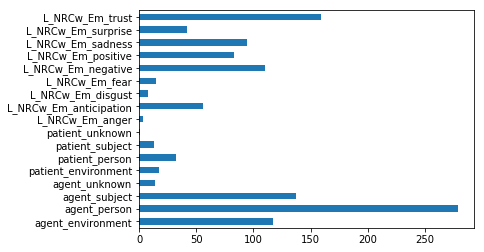

In [62]:
casc.sum().plot(kind='barh')

In [63]:
casc.loc[casc['agent_subject'] == 1, lex_cols].mean()

L_NRCw_Em_anger           0.000000
L_NRCw_Em_anticipation    0.153285
L_NRCw_Em_disgust         0.029197
L_NRCw_Em_fear            0.029197
L_NRCw_Em_negative        0.255474
L_NRCw_Em_positive        0.277372
L_NRCw_Em_sadness         0.226277
L_NRCw_Em_surprise        0.138686
L_NRCw_Em_trust           0.394161
dtype: float64

In [69]:
def pair_cascades(casc, sources, destinations, sep=' & '):
    pairs = product(sources, destinations)
    return pd.DataFrame({
        f"{s}{sep}{d}": casc[s] * casc[d]
        for s, d in pairs})

col_startswith = lambda df, pattern: list(df.columns[df.columns.str.startswith(pattern)])
higher_casc = pair_cascades(casc,
                            col_startswith(casc, ('agent','patient')),
                            col_startswith(casc, 'L_'))
higher_casc

agent_environment & L_NRCw_Em_anger  \
t                                            
0                                        0   
46                                       0   
74                                       0   
120                                      0   
151                                      0   
181                                      0   
294                                      0   
316                                      0   
517                                      0   
603                                      0   
901                                      0   
960                                      0   
1005                                     0   
1016                                     0   
1080                                     0   
1177                                     0   
1383                                     0   
1427                                     0   
1482                                     0   
1531                                     0   
1551                                     0   
1560                                     0   
1587                                     0   
1604                                     0   
1654                                     0   
1674                                     0   
1698                                     0   
1761                                     0   
1834                                     0   
1866                                     0   
...                                    ...   
21369                                    0   
21422                                    0   
21466                                    0   
21493                                    0   
21575                                    0   
21647                                    0   
21728                                    0   
21737                                    0   
21755                                    0   
21956                                    0   
21977                                    0   
22033                                    0   
22046                                    0   
22126                                    0   
22200                                    0   
22266                                    0   
22280                                    0   
22329                                    0   
22367                                    0   
22388                                    0   
22442                                    0   
22486                                    0   
22502                                    0   
22565                                    0   
22589                                    0   
22644                                    0   
22813                                    0   
22831                                    0   
22849                                    0   
22896                                    0   

       agent_environment & L_NRCw_Em_anticipation  \
t                                                   
0                                               0   
46                                              0   
74                                              0   
120                                             0   
151                                             0   
181                                             0   
294                                             0   
316                                             0   
517                                             0   
603                                             0   
901                                             0   
960                                             0   
1005                                            0   
1016                                            0   
1080                                            0   
1177                                            0   
1383                                            0   
1427                                            0   
1482                                            

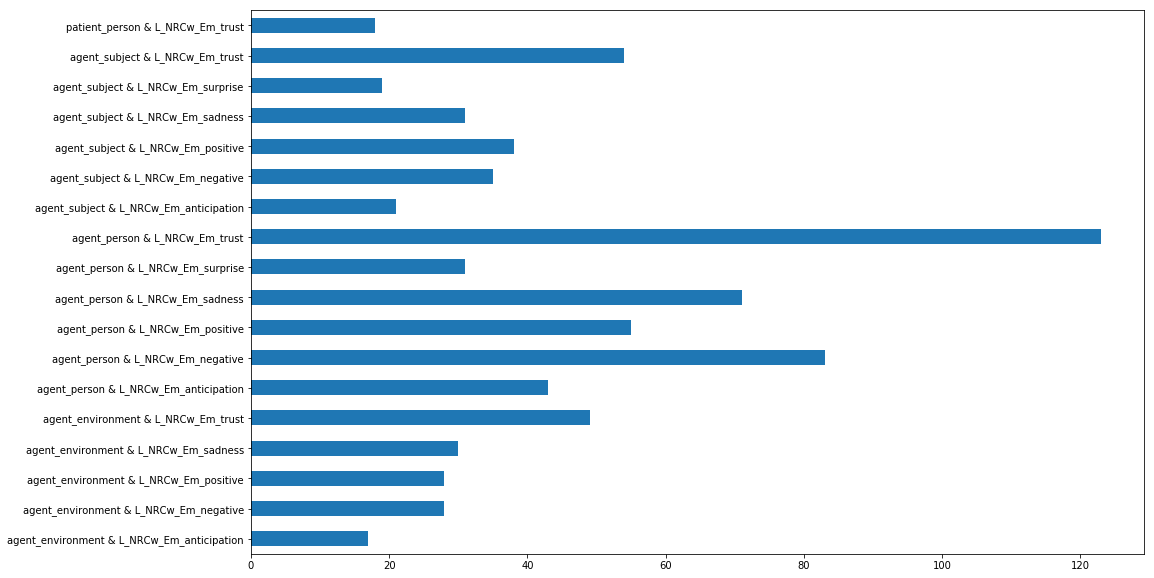

In [81]:
higher_casc = higher_casc.loc[:, higher_casc.sum() > 15]
higher_casc.sum().plot(kind='barh')

In [82]:
from pyinform import transferentropy as te

def transfer_entropies(casc, source_cols, destination_cols, **kwargs):
    #n, m = len(source_cols), len(destination_cols)
    #mat = np.ones([n,m]) * np.nan
    #cols = product(enumerate(source_cols), enumerate(destination_cols))
    rows = []
    for i, sc in enumerate(source_cols):
        rows.append({'source': sc, 
                     **{dc:te.transfer_entropy(casc[sc], casc[dc], **kwargs) for dc in destination_cols }})
    df = pd.DataFrame(rows)
    df.set_index('source', inplace=True, verify_integrity=True)
    return df

#src_cols = (list(casc.columns[casc.columns.str.startswith('L_')]) +
#            list(casc.columns[casc.columns.str.startswith('agent_')]))
#dst_cols = list(casc.columns[casc.columns.str.startswith('patient_')])
all_cols = list(higher_casc.columns)
k = 10
T = transfer_entropies(higher_casc, all_cols, all_cols, k=k)
T

agent_environment & L_NRCw_Em_anticipation  \
source                                                                                   
agent_environment & L_NRCw_Em_anticipation                                4.440892e-16   
agent_environment & L_NRCw_Em_negative                                    1.352145e-02   
agent_environment & L_NRCw_Em_positive                                    1.344586e-02   
agent_environment & L_NRCw_Em_sadness                                     4.172824e-03   
agent_environment & L_NRCw_Em_trust                                       1.053770e-02   
agent_person & L_NRCw_Em_anticipation                                     1.532869e-02   
agent_person & L_NRCw_Em_negative                                         9.141662e-03   
agent_person & L_NRCw_Em_positive                                         9.217517e-03   
agent_person & L_NRCw_Em_sadness                                          3.011435e-03   
agent_person & L_NRCw_Em_surprise                                         5.074213e-03   
agent_person & L_NRCw_Em_trust                                            9.522839e-03   
agent_subject & L_NRCw_Em_anticipation                                    9.167839e-04   
agent_subject & L_NRCw_Em_negative                                        2.591886e-03   
agent_subject & L_NRCw_Em_positive                                        1.650778e-02   
agent_subject & L_NRCw_Em_sadness                                         1.429511e-02   
agent_subject & L_NRCw_Em_surprise                                        2.874390e-03   
agent_subject & L_NRCw_Em_trust                                           1.932666e-02   
patient_person & L_NRCw_Em_trust                                          3.433447e-03   

                                            agent_environment & L_NRCw_Em_negative  \
source                                                                               
agent_environment & L_NRCw_Em_anticipation                            7.436841e-03   
agent_environment & L_NRCw_Em_negative                               -4.440892e-16   
agent_environment & L_NRCw_Em_positive                                9.982470e-03   
agent_environment & L_NRCw_Em_sadness                                 1.001492e-02   
agent_environment & L_NRCw_Em_trust                                   1.417870e-02   
agent_person & L_NRCw_Em_anticipation                                 1.360262e-02   
agent_person & L_NRCw_Em_negative                                     2.302827e-02   
agent_person & L_NRCw_Em_positive                                     4.745120e-03   
agent_person & L_NRCw_Em_sadness                                      9.605335e-03   
agent_person & L_NRCw_Em_surprise                                     4.345787e-03   
agent_person & L_NRCw_Em_trust                                        2.329714e-02   
agent_subject & L_NRCw_Em_anticipation                                8.698324e-03   
agent_subject & L_NRCw_Em_negative                                    8.993470e-03   
agent_subject & L_NRCw_Em_positive                                    1.120531e-02   
agent_subject & L_NRCw_Em_sadness                                     1.263888e-02   
agent_subject & L_NRCw_Em_surprise                                    3.788903e-03   
agent_subject & L_NRCw_Em_trust                                       1.536661e-02   
patient_person & L_NRCw_Em_trust                                      1.238144e-02   

                                            agent_environment & L_NRCw_Em_positive  \
source                                                                               
agent_environment & L_NRCw_Em_anticipation                            1.267776e-02   
agent_environment & L_NRCw_Em_negative                                1.237374e-02   
agent_environment & L_NRCw_Em_positive                               -4.440892e-16   
agent_environment & L_NRCw_Em_sadness                                 2.547776e-02   
agent_

In [76]:
seq_cmap = sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

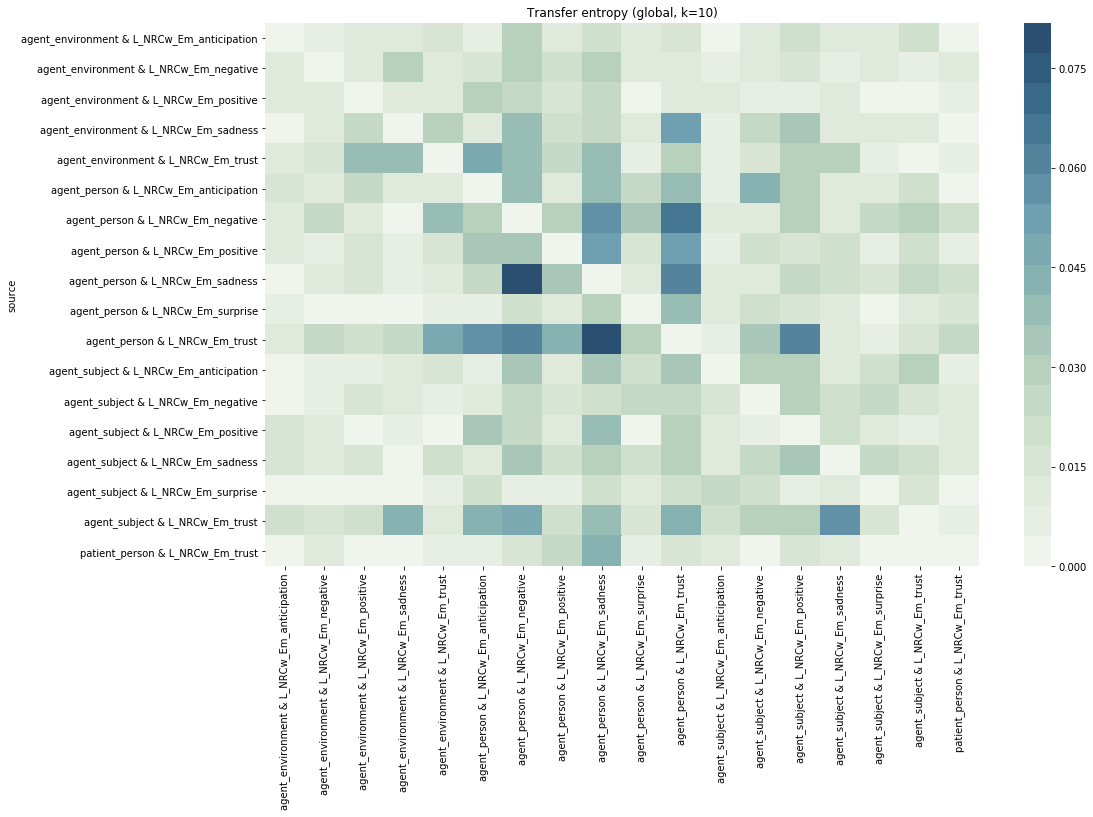

In [83]:
import plotly.figure_factory as ff
#x = te_1.index
#y = te_1.destination

#fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text)#, colorscale='Viridis')
sns.heatmap(T, annot=False, cmap=seq_cmap)
plt.title(f"Transfer entropy (global, k={k})")
plt.show()

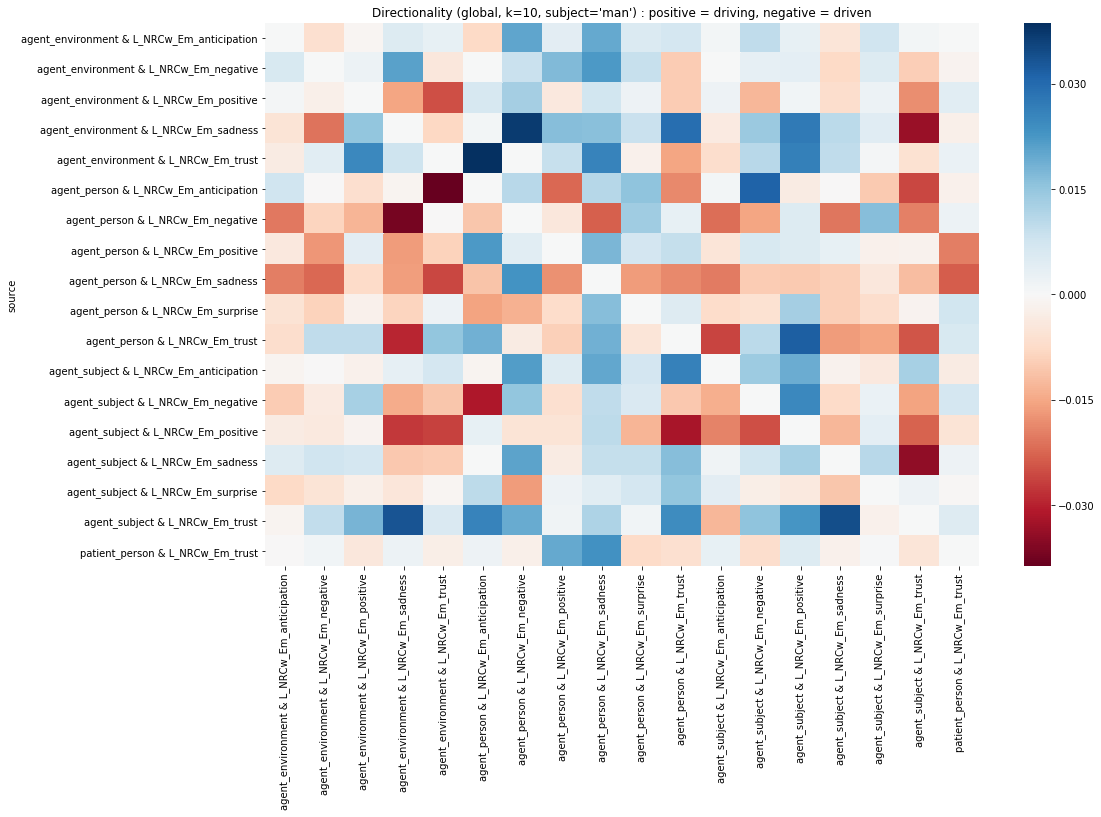

In [84]:
sns.heatmap((T - T.T), annot=False, cmap='RdBu')#, fmt="d")
plt.title(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

In [85]:
from pyinform import blockentropy as be
def get_block_entropies(casc, cols, kmax=10):
    n = len(casc.index)
    
    data = []
    for k in range(1, kmax):
        for c in cols:
            benk = be.block_entropy(casc[c], k=k)
            data.append({'k': k, 'cascade': c, 'block_entropy_k': benk})
    
    return pd.DataFrame(data)

block_entrs = get_block_entropies(higher_casc, all_cols, kmax=30)

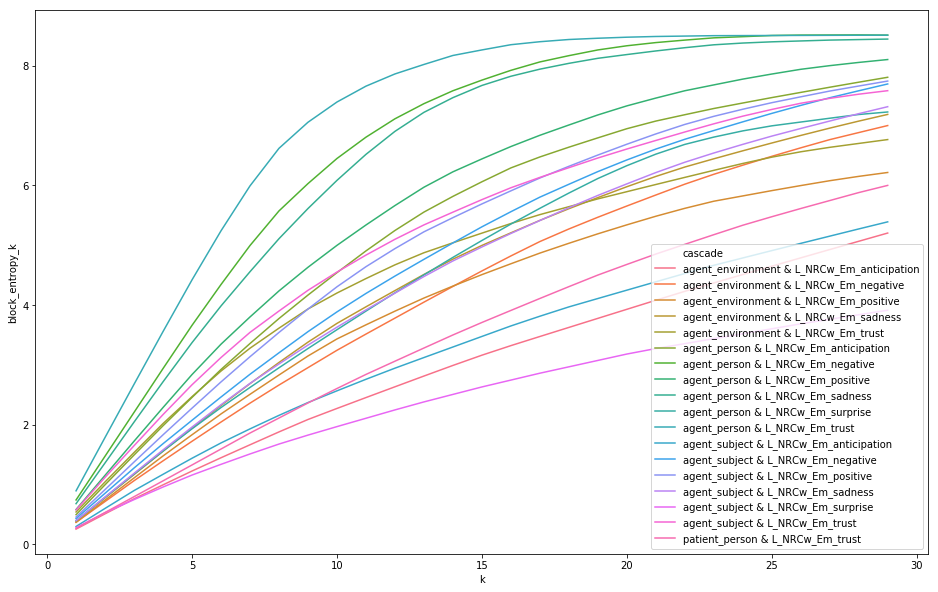

In [88]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='cascade')
plt.show()

In [89]:
block_entrs['block_entropy_k_diff'] = block_entrs.block_entropy_k.diff()
block_entrs[['e','f']] = block_entrs.cascade.str.split(' & ',expand=True)
block_entrs['block_entropy_k_ratio'] = block_entrs.block_entropy_k / block_entrs.k
block_entrs['block_entropy_k_ratio_diff'] = block_entrs['block_entropy_k_ratio'].diff()
#block_entrs['f'] = block_entrs.cascade.str.split(' & ')[1]

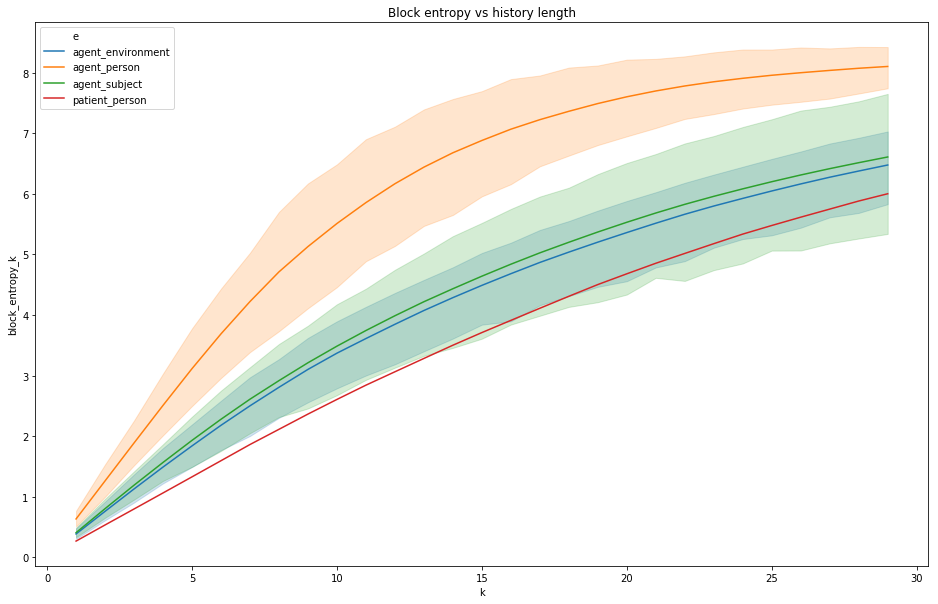

In [93]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='e')
plt.title('Block entropy vs history length')
plt.show()

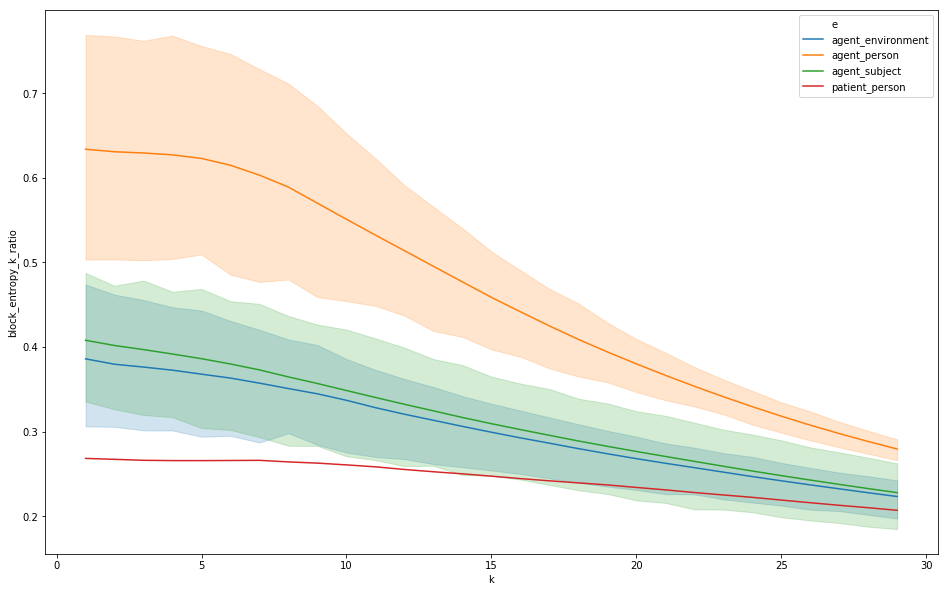

In [94]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='e')
plt.show()

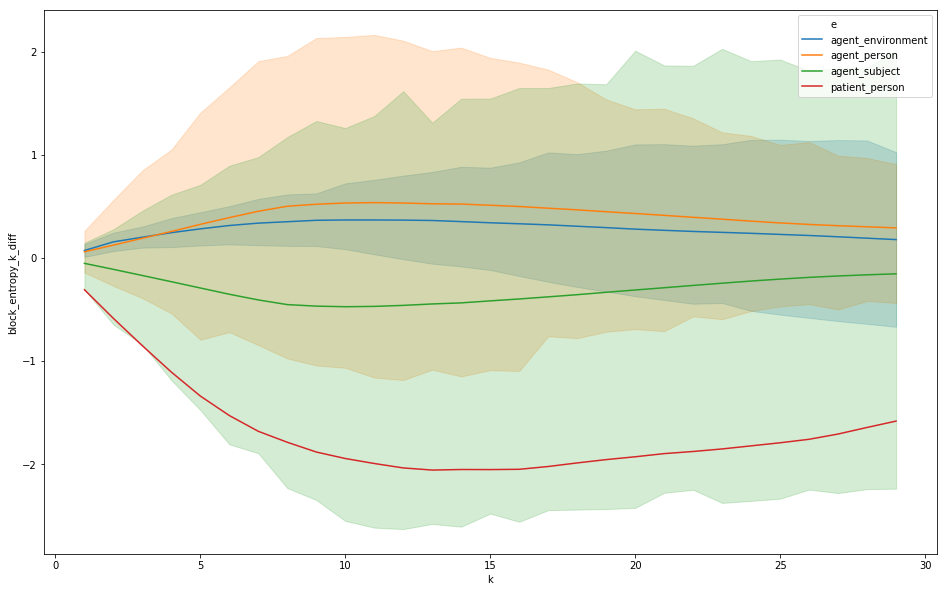

In [95]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_diff', hue='e')
plt.show()

In [86]:
from pyinform import activeinfo as ai

def get_local_ais(casc, cols, k=10):
    n = len(casc.index)
    m = len(cols)
    t = np.tile(np.arange(n), m)
    
    lbl = np.repeat(np.array(cols), n)
    a = []
    pad_w = k-1
    a_c = np.ones([n]) * np.nan
    for c in cols:
        a_c[:-k] = ai.active_info(casc[c], k=k, local=True).squeeze()
        a.append(a_c)
    a = np.concatenate(a)
    
    df = pd.DataFrame({'ais': a, 'cascade': lbl, 't':t})
    df[['e','f']] = df.cascade.str.split(' & ',expand=True)
    return df

ais = get_local_ais(higher_casc, all_cols, k=11)
ais

ais                                     cascade    t  \
0     0.016441  agent_environment & L_NRCw_Em_anticipation    0   
1     0.016441  agent_environment & L_NRCw_Em_anticipation    1   
2     0.016441  agent_environment & L_NRCw_Em_anticipation    2   
3     0.016441  agent_environment & L_NRCw_Em_anticipation    3   
4     0.016441  agent_environment & L_NRCw_Em_anticipation    4   
5     0.016441  agent_environment & L_NRCw_Em_anticipation    5   
6     0.016441  agent_environment & L_NRCw_Em_anticipation    6   
7     0.016441  agent_environment & L_NRCw_Em_anticipation    7   
8     0.016441  agent_environment & L_NRCw_Em_anticipation    8   
9     0.016441  agent_environment & L_NRCw_Em_anticipation    9   
10    0.016441  agent_environment & L_NRCw_Em_anticipation   10   
11    0.016441  agent_environment & L_NRCw_Em_anticipation   11   
12   -0.380399  agent_environment & L_NRCw_Em_anticipation   12   
13    0.069634  agent_environment & L_NRCw_Em_anticipation   13   
14    0.069634  agent_environment & L_NRCw_Em_anticipation   14   
15    0.069634  agent_environment & L_NRCw_Em_anticipation   15   
16   -0.037281  agent_environment & L_NRCw_Em_anticipation   16   
17   -0.045843  agent_environment & L_NRCw_Em_anticipation   17   
18   -0.045843  agent_environment & L_NRCw_Em_anticipation   18   
19    0.069634  agent_environment & L_NRCw_Em_anticipation   19   
20    0.069634  agent_environment & L_NRCw_Em_anticipation   20   
21   -0.308877  agent_environment & L_NRCw_Em_anticipation   21   
22   -0.252294  agent_environment & L_NRCw_Em_anticipation   22   
23    0.069634  agent_environment & L_NRCw_Em_anticipation   23   
24    0.016441  agent_environment & L_NRCw_Em_anticipation   24   
25    0.016441  agent_environment & L_NRCw_Em_anticipation   25   
26   -0.380399  agent_environment & L_NRCw_Em_anticipation   26   
27    0.069634  agent_environment & L_NRCw_Em_anticipation   27   
28    0.069634  agent_environment & L_NRCw_Em_anticipation   28   
29    0.069634  agent_environment & L_NRCw_Em_anticipation   29   
...        ...                                         ...  ...   
7044 -0.308877            patient_person & L_NRCw_Em_trust  363   
7045 -0.252294            patient_person & L_NRCw_Em_trust  364   
7046  0.069634            patient_person & L_NRCw_Em_trust  365   
7047  0.016441            patient_person & L_NRCw_Em_trust  366   
7048  0.016441            patient_person & L_NRCw_Em_trust  367   
7049  0.016441            patient_person & L_NRCw_Em_trust  368   
7050  0.016441            patient_person & L_NRCw_Em_trust  369   
7051  0.016441            patient_person & L_NRCw_Em_trust  370   
7052  0.016441            patient_person & L_NRCw_Em_trust  371   
7053  0.016441            patient_person & L_NRCw_Em_trust  372   
7054  0.016441            patient_person & L_NRCw_Em_trust  373   
7055  0.016441            patient_person & L_NRCw_Em_trust  374   
7056  0.016441            patient_person & L_NRCw_Em_trust  375   
7057  0.016441            patient_person & L_NRCw_Em_trust  376   
7058  0.016441            patient_person & L_NRCw_Em_trust  377   
7059  0.016441            patient_person & L_NRCw_Em_trust  378   
7060  0.016441            patient_person & L_NRCw_Em_trust  379   
7061  0.016441            patient_person & L_NRCw_Em_trust  380   
7062  0.016441            patient_person & L_NRCw_Em_trust  381   
7063       NaN            patient_person & L_NRCw_Em_trust  382   
7064       NaN            patient_person & L_NRCw_Em_trust  383   
7065       NaN            patient_person & L_NRCw_Em_trust  384   
7066       NaN            patient_person & L_NRCw_Em_trust  385   
7067       NaN            patient_person & L_NRCw_Em_trust  386   
7068       NaN            patient_person & L_NRCw_Em_trust  387   
7069       NaN            patient_person & L_NRCw_Em_trust  388   
7070       NaN            patient_person & L_NRCw_Em_trust  389   
7071       NaN            patient_person & L_NRCw_Em_trust

In [87]:
fig = lambda:go.Figure(
    data=[go.Scattergl(
        x=ais.t,
        y=ais.ais,
        marker=dict(color=ais.f),
        #line=dict(color='rgb(0,100,80)'),
        #line=dict(color=color),
        mode='markers',
        name=dict(color=ais.f),
    )],
)
#py.offline.iplot(fig)
#fig, ax = plt.subplots()
sns.scatterplot(data=ais.groupby('t').mean().reset_index(), x='t', y='ais', hue='e', ax=ax)
#py.offline.plot_mpl(fig)
#ais.groupby('e',.rolling(20, by='t').agg(['mean','min','max'])

NameError: name 'ax' is not defined

In [ ]:
from plotly.colors import DEFAULT_PLOTLY_COLORS
#sns.lineplot(data=ais[ais.t < 200], x='t', y='ais', hue='e')
#plt.show()
ais_ts = ais.groupby('f').rolling(5).agg(['mean', 'min', 'max'])

def filled_plot(data, x, y, group, rolling_size=20, **kwargs):
    
    
    X = data.groupby(group)
    X = X.rolling(rolling_size, on=x)
    X = X.agg({y:['mean', 'min', 'max']})
    X.columns = X.columns.to_flat_index()
    #X.reset_index(level=['e','f'])
    
    
    
    data = [
        p
        for (gname, gframe), color in zip(X.groupby(group), DEFAULT_PLOTLY_COLORS)
        for p in filled_line(gframe, name=gname, color=color)
    ]       
    
    
    #X = X.unstack(['e','f'])
    #X.loc[('agent_environment','L_NRCw_Em_negative'),[('ais','mean')]]
    
    grouped = data.groupby(group)
    rolled = grouped.rolling(rolling_size)
    agg = rolled.agg({'t': 'mean', 'ais':['mean', 'min', 'max']})
    agg.columns = agg.columns.to_flat_index()
    
    trend = agg['ais', 'mean']
    x = agg['t', 'mean']
    x_rev = x.iloc[::-1]
    y = ['ais', 'mean']
    y_lb = ['ais', 'min']
    y_ub = ['ais', 'max']
    
    def filled_line(frame, color, name=None, **kwargs):
        
        filled = lambda:go.Scattergl(
            x=x + x.iloc[::-1],
            y=pd.concat([y['min'], y['max']]),
            fill='tozerox',
            fillcolor=color,
            #line=dict(color='rgba(255,255,255,0)'),
            #showlegend=False,
            opacity=0.2,
            name=name,
            **kwargs,
        )
        return [
            #filled,
            go.Scattergl(
                x=x,
                y=y['mean'],
                #line=dict(color='rgb(0,100,80)'),
                line=dict(color=color),
                mode='lines',
                name=name,
                **kwargs,
            ),
        ] 
    
    return go.Figure(
        #data=data,
        #layout=layout,
        data=[
            p
            for (gname, gframe, win_), color in zip(grouped, DEFAULT_PLOTLY_COLORS)
            for p in filled_line(gframe, x=x, y=y, name=gname, color=color)
        ]
    )
    
#fig = filled_plot(ais_ts, x='t', y='ais', group='cascade')

#fig = filled_plot(data=ais[ais.t < 200], x='t', y='ais', group='cascade')
#py.offline.iplot(fig)
#for gn, gf in 
#sns.lineplot(data=ais.rolling(20).mean(), x='t', y='ais', hue='e')
#plt.show()
#sns..plot(x='t', y='ais',kind='line')

rolling_size = 20
grouped = ais.groupby(['e','f'])
rolled = grouped.rolling(rolling_size)
trend = rolled['ais'].mean()
x = rolled['t'].mean()
x_rev = x.iloc[::-1]

In [810]:
X = ais.groupby(['e','f'])
#X = X.reset_index()
X = X.rolling(20, on='t')
trend = X.ais.mean()
X = X.agg({'ais':['mean', 'min', 'max']})
X.columns = X.columns.to_flat_index()
X.apply(lambda s: s - trend, axis='columns')
#X = X.unstack(['e','f'])
#X.loc[:,[('ais','mean')]]
#X.reset_index(level)
##['t','mean']
#X['agent_environment', 'L_NRCw_Em_negative']['t','mean']
#g = grouped.rolling(20)
#g.index[:2]#e, f, win = g.index
#g['t','mean']['patient_person', 'L_NRCw_Em_trust']#[['t','mean']]#,'ais']
#for k,x in g.iterrows():
#    print(k,x)
    #print(gf.describe())
#for x in g[[('t', 'mean'), 'ais']]:
    #print(x)
    #continue
    #print(gn)
    #print(gf[[('t', 'mean'), 'ais']].describe())

ValueError: ('cannot join with no overlapping index names', 'occurred at index (agent_environment, L_NRCw_Em_negative, 0)')

In [734]:
#sns.g
g = grouped.rolling(20)
sns.lineplot(data=g.agg({'t': 'mean', 'ais':['mean', 'min', 'max']}), 
             x=('t', 'mean'), y=('ais', 'mean'), hue=g.index)
plt.show()

ValueError: Could not interpret input 'cascade'

In [737]:
sns.lineplot(data=ais, x='t', y='ais')

AttributeError: 'RollingGroupby' object has no attribute 'index'

In [590]:
py.offline.plot_mpl?

In [591]:
spacy.util.minibatch?

In [5]:
list.pop?

In [ ]:
[].append

In [ ]:
[].push

In [ ]:
[].pop

In [8]:
import spacy
spacy.__version__

'2.1.3'

In [22]:
a = []
a.extend((range(3)))
a.extend((range(4,7)))
print(a)
a.pop(0), a.pop(0), a

[0, 1, 2, 4, 5, 6]


(0, 1, [2, 4, 5, 6])

In [24]:
doc

NameError: name 'doc' is not defined